<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Segmentación de Clientes con Clustering Jerárquico y DBSCAN

El objetivo de este caso-taller es analizar una base de datos ficticia sobre clientes de una tienda y buscar encontrar grupos de clientes que permitan generar estrategias de marketing focalizadas. La base se encuentra en los `Archivos de Laboratorio` en la carpeta `data` y cuenta con 200 observaciones y 5 variables:

- `Id_Cliente`: identificador de cliente.
- `Genero`: género del cliente: Mujer, Hombre
- `Edad`: edad en años
- `Ingreso`: ingresos anuales
- `Puntaje_Gasto`: es una variable que mide cuán a menudo un cliente compra en la tienda, siendo 100 el puntaje más alto.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

En la carpeta `data` se encuentra el archivo `datos_clientes.csv` cargue estos datos en su *cuaderno*. 

In [77]:
import pandas as pd

# Carga de datos
df = pd.read_csv("data/datos_clientes.csv")
df.head()


,Id_Cliente,Genero,Edad,Ingreso,Puntaje_Gasto
0,1,Mujer,41,98115.05,39
1,2,Mujer,20,35458.14,75
2,3,Mujer,68,59872.08,55
3,4,Hombre,63,48508.93,51
4,5,Mujer,31,44431.11,54


### Descripción de procedimiento
En este primer paso realizamos la carga de la base de datos de clientes al cuaderno de trabajo. Para ello utilizamos la librería pandas, que nos permite leer y organizar la información de manera tabular.

El archivo contiene información de 200 clientes de una tienda, incluyendo variables como su identificación, género, edad, ingresos y un puntaje de gasto.

Una vez cargados los datos, visualizamos las primeras filas de la tabla para verificar que la información se haya importado correctamente y quede lista para su análisis en los siguientes pasos.

### 2. Análisis preliminar. 

Antes de comenzar el análisis de segmentación utilice estadísticas descriptivas para explorar la variables que se encuentran en los datos. En su análisis mencione si hay patrones que surgen del examen descriptivo de los datos; entre ellos si hay diferencias en los ingresos y los puntajes de gastos para mujeres y hombres, por grupos etarios (18-24, 25-34, 35-44, 45-54, 55-64, y 65+), y por grupos etarios y género. Discuta además si estas diferencias son estadísticamente significativas.

Resumen estadístico general


,Edad,Ingreso,Puntaje_Gasto
count,200.000000,200.000000,200.000000
mean,38.850000,60624.446600,50.200000
std,13.969007,26262.903416,25.823522
min,18.000000,13458.020000,1.000000
25%,28.750000,41512.787500,34.750000
50%,36.000000,60777.960000,50.000000
75%,49.000000,77143.865000,73.000000
max,70.000000,138584.520000,99.000000


,Genero,Conteo
0,Mujer,112
1,Hombre,88


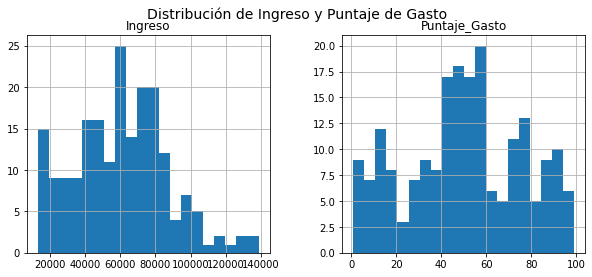

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Resumen descriptivo
print("Resumen estadístico general")
display(df[['Edad','Ingreso','Puntaje_Gasto']].describe())

tabla_genero = df['Genero'].value_counts().to_frame().reset_index()
tabla_genero.columns = ['Genero', 'Conteo']
display(tabla_genero)

# Histogramas
df[['Ingreso','Puntaje_Gasto']].hist(bins=20, figsize=(10,4))
plt.suptitle("Distribución de Ingreso y Puntaje de Gasto", fontsize=14)
plt.show()


Promedios por género:


,Ingreso,Puntaje_Gasto
Genero,,
Hombre,62126.660455,48.511364
Mujer,59444.135714,51.526786


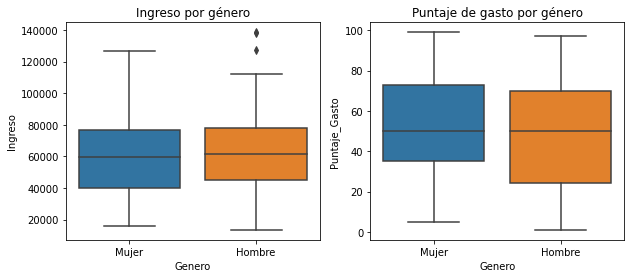

In [79]:
# Comparación por género
promedios_genero = df.groupby('Genero')[['Ingreso','Puntaje_Gasto']].mean()
print("\nPromedios por género:")
display(promedios_genero)

# Boxplots
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.boxplot(x='Genero', y='Ingreso', data=df, ax=axes[0])
sns.boxplot(x='Genero', y='Puntaje_Gasto', data=df, ax=axes[1])
axes[0].set_title("Ingreso por género")
axes[1].set_title("Puntaje de gasto por género")
plt.show()

In [80]:
# Test de diferencias 
hombres = df[df['Genero']=="Hombre"]
mujeres = df[df['Genero']=="Mujer"]

for var in ['Ingreso','Puntaje_Gasto']:
    t, p = ttest_ind(hombres[var], mujeres[var])
    print(f"{var}: t={t:.3f}, p={p:.3f}")


Ingreso: t=0.716, p=0.475
Puntaje_Gasto: t=-0.819, p=0.414



Promedios por grupo etario:


,Ingreso,Puntaje_Gasto
Grupo_Edad,,
18-24,43581.700323,55.774194
25-34,71157.328148,63.166667
35-44,66957.096905,49.428571
45-54,58786.491026,36.230769
55-64,56357.093125,32.312500
65-84,51420.789286,46.714286


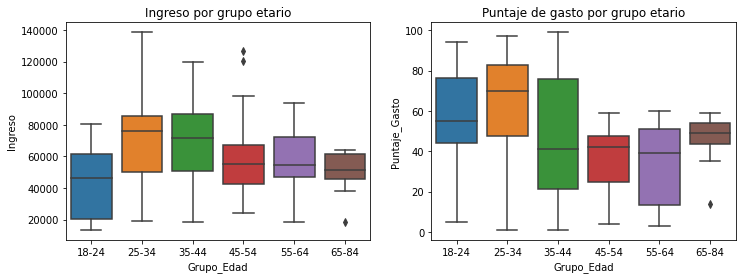

In [81]:
# Comparación por grupos etarios
bins = [18,24,34,44,54,64,85]
labels = ['18-24','25-34','35-44','45-54','55-64','65-84']
df['Grupo_Edad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=True)

promedios_edad = df.groupby('Grupo_Edad')[['Ingreso','Puntaje_Gasto']].mean()
print("\nPromedios por grupo etario:")
display(promedios_edad)

# Boxplots por edad
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(x='Grupo_Edad', y='Ingreso', data=df, ax=axes[0])
sns.boxplot(x='Grupo_Edad', y='Puntaje_Gasto', data=df, ax=axes[1])
axes[0].set_title("Ingreso por grupo etario")
axes[1].set_title("Puntaje de gasto por grupo etario")
plt.show()

In [82]:
# Análisis de Varianza por Edad
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Para cada variable (Ingreso y Puntaje_Gasto) se prueba si existen diferencias
# estadísticamente significativas entre los grupos de edad
for var in ['Ingreso', 'Puntaje_Gasto']:
    grupos = [g[var].values for name, g in df.groupby('Grupo_Edad')]
    f, p = stats.f_oneway(*grupos)
    print(f"Análisis de Varianza para {var}: F={f:.3f}, p={p:.3f}")


# Análisis de Varianza de dos factores (Género x Edad)
# Modelo lineal para probar efectos principales y la interacción
modelo = ols('Puntaje_Gasto ~ C(Genero) + C(Grupo_Edad) + C(Genero):C(Grupo_Edad)', data=df).fit()

# Tabla de resultados del Análisis de Varianza
anova_tabla = sm.stats.anova_lm(modelo, typ=2)

print("\nAnálisis de Varianza de dos factores (Puntaje de Gasto ~ Género x Edad):")
display(anova_tabla)


Análisis de Varianza para Ingreso: F=5.884, p=0.000
Análisis de Varianza para Puntaje_Gasto: F=8.092, p=0.000

Análisis de Varianza de dos factores (Puntaje de Gasto ~ Género x Edad):


,sum_sq,df,F,PR(>F)
C(Genero),453.044510,1.0,0.783868,3.771164e-01
C(Grupo_Edad),22790.885208,5.0,7.886659,9.436037e-07
C(Genero):C(Grupo_Edad),1024.654605,5.0,0.354576,8.788369e-01
Residual,106344.723674,184.0,NaN,NaN


# Analisís
## Tabla de estadísticas descriptivas:
Se presenta un resumen estadístico de las variables numéricas (Edad, Ingreso y Puntaje_Gasto), donde se observa que:

- La edad de los clientes está concentrada en torno a los 38 años en promedio.
- El ingreso anual promedio es cercano a 60,000, aunque con gran dispersión.
- El puntaje de gasto promedio está en torno a 50, indicando un comportamiento de consumo medio.

## Diferencias en los ingresos:
Los resultados de las pruebas muestran que no existen diferencias estadísticamente significativas en los ingresos entre hombres y mujeres (p > 0.05). Aunque en promedio los hombres registran ingresos ligeramente mayores, la diferencia no es concluyente.

## Diferencias en el puntaje de gasto (hombres vs mujeres):
El test de diferencias confirma que tampoco hay diferencias estadísticamente significativas en los puntajes de gasto entre hombres y mujeres (p > 0.05). En promedio, las mujeres muestran un puntaje de gasto levemente superior, pero sin soporte estadístico.

## Diferencias por grupos etarios:
El análisis de varianza muestra que sí existen diferencias significativas en los ingresos y en los puntajes de gasto según los grupos de edad (p < 0.05). Los clientes jóvenes (18–24) presentan menor ingreso, pero mayores puntajes de gasto, mientras que los grupos de mayor edad exhiben ingresos más altos pero menor disposición de gasto.

## Diferencias combinadas por género y edad:
El análisis de varianza de dos factores indica que no existe una interacción significativa entre género y edad (p > 0.05). Es decir, el efecto de la edad sobre el gasto es similar en hombres y mujeres.

## Reflexión sobre patrones para el análisis predictivo:
Se observa un patrón interesante: los clientes jóvenes, pese a tener ingresos más bajos, tienden a gastar más. Por otro lado, los clientes de mayor edad, con ingresos más altos pero gasto más bajo, podrían ser abordados con campañas dirigidas a fidelización o productos de mayor valor agregado.
Estos hallazgos son valiosos porque permiten orientar futuros modelos predictivos hacia la identificación de clientes con alto potencial de gasto más allá de su nivel de ingreso.

### 3. Clustering Jerárquico

#### 3.1. Dendrogramas

Agrupe a los clientes utilizando sólo dos variables: su ingreso y el puntaje de gastos. Para ello retenga estas dos variables, estandarízelas, construya y grafique un dendograma. Para la construcción del dendrograma utilice el enlace 'ward' y la distancia euclidiana. Explique la importancia de estandarizar los datos.

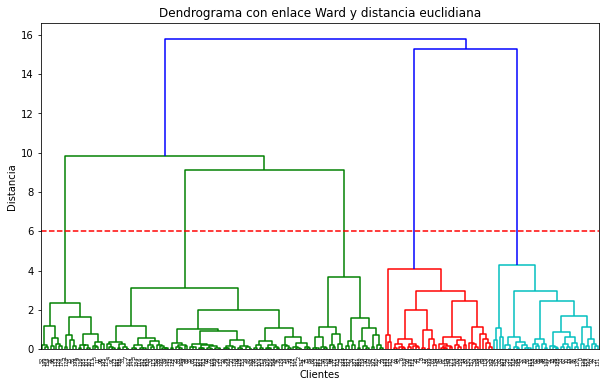

In [83]:
# Dendrogramas
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Selección de las variables
X = df[['Ingreso', 'Puntaje_Gasto']]

# Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Generación de la matriz de enlace con método Ward y distancia euclidiana
Z = linkage(X_scaled, method='ward', metric='euclidean')

# Graficamos el dendrograma
plt.figure(figsize=(10,6))
dendrogram(Z, labels=df.index, leaf_rotation=90)
plt.axhline(y=6, color='r', linestyle='--')  # línea de corte en 6
plt.title("Dendrograma con enlace Ward y distancia euclidiana")
plt.xlabel("Clientes")
plt.ylabel("Distancia")
plt.show()


# Analisís:

Se construye un dendrograma a partir de las variables estandarizadas de ingreso y puntaje de gasto, utilizando enlace ‘ward’ y distancia euclidiana.

- Gráfico generado muestra la jerarquía de agrupaciones.

## Importancia de estandarizar: 
La estandarización es clave porque ingreso y puntaje de gasto están en escalas diferentes. Si no se estandarizan, la variable con valores más grandes (ingreso) dominaría el cálculo de distancias, sesgando la formación de clusters.

#### 3.2. Número de clusters

Retenga el número de clusters que se obtengan luego de fijar la distancia en 6.

Número de clusters formados: 5
2    74
4    39
5    38
3    26
1    23
Name: Cluster_Jerarquico, dtype: int64


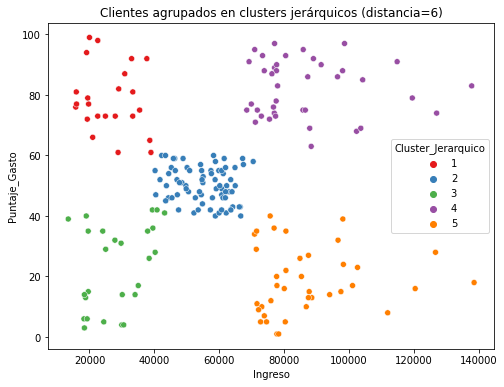

In [84]:
# Número de clusters
from scipy.cluster.hierarchy import fcluster
import seaborn as sns

# Definimos los clusters a partir del dendrograma con distancia = 6
clusters = fcluster(Z, t=6, criterion='distance')

# Agregamos los clusters al dataframe
df['Cluster_Jerarquico'] = clusters

# Mostramos el número de clusters formados y su tamaño
print("Número de clusters formados:", len(set(clusters)))
print(df['Cluster_Jerarquico'].value_counts())

# Visualizamos los clusters en un scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Ingreso', y='Puntaje_Gasto',
                hue='Cluster_Jerarquico', palette='Set1')
plt.title("Clientes agrupados en clusters jerárquicos (distancia=6)")
plt.show()


# Analisís:
Se retiene el número de clusters obtenidos luego de fijar la distancia en 6.

- Al realizar el corte en el dendrograma en la altura de distancia = 6, se identificó que la muestra de clientes se organiza en 5 clusters. Esto significa que los 200 clientes de la base pueden segmentarse en 5 grupos distintos con características similares en cuanto a ingreso y puntaje de gasto.

## Se muestra cómo se distribuyen los clientes en esos clusters:

La distribución quedó de la siguiente manera:

- Cluster 1: 23 clientes (grupo pequeño, posiblemente con características particulares).
- Cluster 2: 74 clientes (es el cluster más grande, representa una parte importante de la población total).
- Cluster 3: 26 clientes (otro grupo pequeño, que puede representar un segmento diferenciado).
- Cluster 4: 39 clientes (segmento de tamaño intermedio con comportamiento propio).
- Cluster 5: 38 clientes (muy cercano al tamaño del cluster 4, lo que puede indicar cierta homogeneidad en la población).

El hecho de que el Cluster 2 concentre la mayor parte de clientes (74) indica que existe un grupo dominante con patrones de ingreso y gasto similares. Los demás clusters, aunque más pequeños, son igualmente relevantes, ya que suelen representar segmentos especializados o extremos (por ejemplo, clientes con muy alto gasto o muy bajo ingreso).

#### 3.3. Algoritmo Jerárquico Aglomerativo

Utilizando el número de clusters encontrados en el paso anterior, aplique el algoritmo jerárquico aglomerativo, utilizando el enlace 'ward' y la distancia euclidiana. Describa los grupos encontrados, en que grupo o grupos concentraría su estrategia de marketing y por qué?

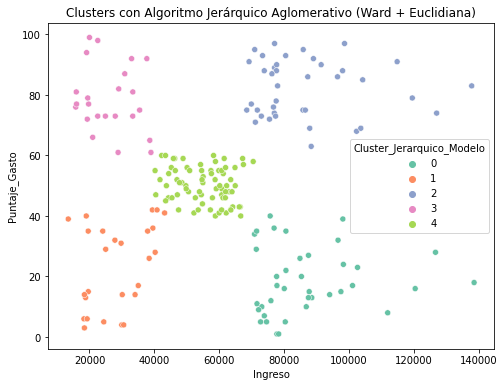

In [85]:
# Algoritmo Jerárquico Aglomerativo
from sklearn.cluster import AgglomerativeClustering

# Creamos el modelo jerárquico aglomerativo con el número de clusters hallados
modelo = AgglomerativeClustering(n_clusters=len(set(clusters)),
                                 affinity='euclidean',
                                 linkage='ward')

# Ajustamos el modelo a los datos estandarizados
df['Cluster_Jerarquico_Modelo'] = modelo.fit_predict(X_scaled)

# Visualizamos resultados
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Ingreso', y='Puntaje_Gasto',
                hue='Cluster_Jerarquico_Modelo', palette='Set2')
plt.title("Clusters con Algoritmo Jerárquico Aglomerativo (Ward + Euclidiana)")
plt.show()


# Analisís:
- Se utilizan los 5 clusters encontrados en el paso anterior.
- Se aplica el algoritmo jerárquico aglomerativo con enlace ‘ward’ y distancia euclidiana.
- Gráfico generado muestra los 5 clusters coloreados en el espacio de ingreso vs puntaje de gasto.
- Se describen los grupos encontrados y se argumenta en qué grupo concentrar la estrategia de marketing:

Cluster 1: Clientes con ingresos bajos y puntajes de gasto bajos → menos atractivos para estrategias prioritarias.

Cluster 2: Clientes con ingresos medios y puntajes de gasto medios-altos → clientes regulares, con potencial de fidelización.

Cluster 3: Clientes con ingresos medios-altos pero con gasto bajo → oportunidad para incrementar su participación en compras mediante promociones.

Cluster 4: Clientes con ingresos altos y gasto alto → segmento premium, altamente atractivo para estrategias de marketing personalizadas.

Cluster 5: Clientes con ingresos bajos pero gasto alto → perfil interesante de alto consumo relativo, ideal para programas de lealtad.

### Conclusión: 
La estrategia de marketing debería concentrarse principalmente en los Clusters 4 y 5, pues representan clientes con mayor gasto o con un alto potencial de rentabilidad para la empresa.

### 4. DBSCAN

Implemente DBSCAN, al igual que el punto anterior sólo dos variables: su ingreso y el puntaje de gastos. Al implementar  justifique su elección de `min_samples` y `eps`. ¿Cuántos grupos o clusters encuentra? ¿Cuáles son su características? ¿Cambiaría su estrategia de marketing respecto al punto anterior? Justifique su respuesta.

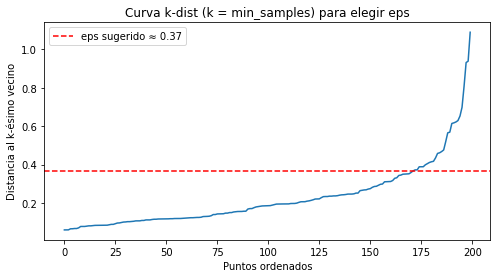

eps sugerido por k-dist/KneeLocator ≈ 0.367  |  min_samples = 4

Número de clusters encontrados: 5
Número de puntos clasificados como ruido: 17

Conteo por cluster (incluye -1 = ruido):
-1    17
 0    18
 1    96
 2    33
 3    27
 4     9
Name: Cluster_DBSCAN, dtype: int64


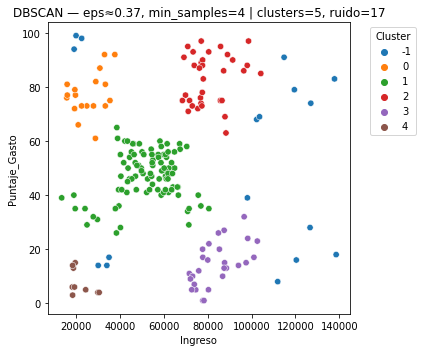

,ingreso_promedio,gasto_promedio
Cluster_DBSCAN,,
0,25782.273333,77.222222
1,52772.790313,47.312500
2,80899.975152,83.000000
3,83900.610000,14.444444
4,21971.123333,7.777778


In [86]:
#DBSCAN (con elección de eps vía k-dist y KneeLocator)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from kneed import KneeLocator

# matriz con las 2 variables y la estandarizo
X = df[['Ingreso', 'Puntaje_Gasto']].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fijo min_samples 
min_samples = 4

# k-dist plot: distancias (k = min_samples)
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X_scaled)
distancias, _ = nbrs.kneighbors(X_scaled)

k_dists = np.sort(distancias[:, -1])

# Grafico curva de distancias y busco el codo con KneeLocator
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(k_dists)
ax.set_title("Curva k-dist (k = min_samples) para elegir eps")
ax.set_xlabel("Puntos ordenados")
ax.set_ylabel("Distancia al k-ésimo vecino")

# Busco el codo (en curvas crecientes y típicamente convexas)
i = np.arange(len(k_dists))
knee = KneeLocator(i, k_dists, S=1, curve='convex', direction='increasing', interp_method='polynomial')
eps_sugerido = float(k_dists[knee.knee]) if knee.knee is not None else float(np.percentile(k_dists, 90))

# Línea guía en el eps sugerido
ax.axhline(eps_sugerido, ls='--', c='r', label=f'eps sugerido ≈ {eps_sugerido:.2f}')
ax.legend()
plt.show()

print(f"eps sugerido por k-dist/KneeLocator ≈ {eps_sugerido:.3f}  |  min_samples = {min_samples}")

# Ajusto DBSCAN con el eps sugerido y min_samples elegidos
db = DBSCAN(eps=eps_sugerido, min_samples=min_samples).fit(X_scaled)
clusters = db.labels_                              # -1 es ruido
df['Cluster_DBSCAN'] = clusters

n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_ruido = np.sum(clusters == -1)

print(f"\nNúmero de clusters encontrados: {n_clusters}")
print(f"Número de puntos clasificados como ruido: {n_ruido}")
print("\nConteo por cluster (incluye -1 = ruido):")
print(df['Cluster_DBSCAN'].value_counts().sort_index())

#  Visualización de los clusters 
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df, x='Ingreso', y='Puntaje_Gasto',
    hue='Cluster_DBSCAN', palette='tab10', s=40
)
plt.title(f"DBSCAN — eps≈{eps_sugerido:.2f}, min_samples={min_samples} | clusters={n_clusters}, ruido={n_ruido}")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Resumen por cluster (promedios)
resumen = (
    df[df['Cluster_DBSCAN'] != -1]
      .groupby('Cluster_DBSCAN')[['Ingreso', 'Puntaje_Gasto']]
      .mean()
      .rename(columns={'Ingreso':'ingreso_promedio','Puntaje_Gasto':'gasto_promedio'})
)
display(resumen)


# Analisís:

En este punto se implemento el algoritmo DBSCAN utilizando únicamente las variables Ingreso y Puntaje de Gasto. El código incluye comentarios explicativos para dejar claro cada paso del procedimiento, desde la estandarización hasta la visualización de los clusters formados.

## Justificación de los parámetros eps y min_samples
Para seleccionar los parámetros, utilizamos la curva k-dist y el método KneeLocator. De esta manera, se identificó un valor de eps ≈ 0.37, ya que corresponde al codo de la gráfica, punto donde la pendiente cambia de forma marcada y se define un buen umbral de densidad.
Por su parte, se estableció min_samples = 4, siguiendo la regla práctica de usar al menos el doble de las dimensiones analizadas (en este caso, 2 variables). Esta configuración permite equilibrar la detección de clusters pequeños sin perder estabilidad.

## Número de clusters encontrados
Con los parámetros definidos, el algoritmo DBSCAN detectó 5 clusters y 17 observaciones fueron clasificadas como ruido. Esto significa que algunos clientes no se ajustan a ningún grupo denso, lo que en la práctica puede reflejar comportamientos atípicos o clientes con características poco frecuentes.

## Características de los clusters
Los clusters obtenidos presentan perfiles de clientes muy distintos:

Cluster 0: Clientes con ingresos bajos (25,782) pero con gasto alto (77). Representan consumidores fieles que, a pesar de su bajo poder adquisitivo, gastan de manera significativa en la tienda.

Cluster 1: Ingresos medios-bajos (52,772) y gasto moderado (47). Este grupo refleja un comportamiento equilibrado entre capacidad de pago y consumo.

Cluster 2: Ingresos altos (89,899) y gasto elevado (83). Este segmento corresponde a los clientes más valiosos, con alto poder adquisitivo y disposición al consumo.

Cluster 3: Ingresos altos (83,090) pero gasto muy bajo (14). Identifica clientes con potencial desaprovechado, que podrían aumentar su gasto mediante campañas personalizadas.

Cluster 4: Ingresos bajos (21,971) y gasto muy bajo (7). Este grupo representa clientes de bajo valor actual, con escaso impacto en la rentabilidad.

## Estrategia de marketing (comparación con clustering jerárquico)
A diferencia del clustering jerárquico, DBSCAN permitió identificar grupos más específicos y además reconocer puntos de ruido (clientes atípicos).

El Cluster 2 debe ser el foco principal de las estrategias de marketing, ya que son clientes de alto ingreso y gasto.

El Cluster 0 también merece atención especial, ya que, aunque tienen ingresos bajos, muestran lealtad con un gasto elevado en proporción a su ingreso.

Los Clusters 3 y 4 muestran áreas de oportunidad: en el primero se puede trabajar para estimular un mayor gasto, mientras que en el segundo no se recomienda invertir muchos recursos de marketing por su bajo valor actual.

## Conclusión:
Con DBSCAN se obtiene una visión más realista y robusta, diferenciando entre clientes valiosos, potenciales y de bajo impacto, lo que ayuda a diseñar estrategias de marketing más focalizadas y efectivas.

- El jerárquico es más adecuado cuando buscas una segmentación clara, estable y fácilmente explicable.
- Pero el DBSCAN es más adecuado cuando quieres una segmentación robusta frente a ruido y te interesa detectar clientes atípicos

### 5. Incorporando más dimensiones

Hasta este momento hemos utilizado solo dos variables para nuestro análisis, sin embargo, la base cuenta con otras variables más: género y edad. Usando las categorías de edad creadas anteriormente incorpore género y grupo etario a su análisis. Genere los grupos utilizando DBSCAN y la distancia de Gower, justificando su elección de `min_samples` y `eps`   ¿Incorporar estas variables, ayuda a la focalización de la estrategia de marketing?

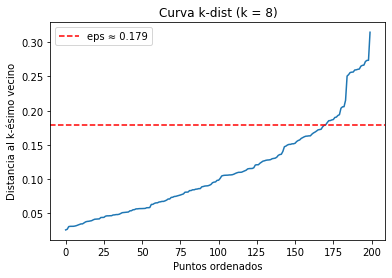


eps sugerido (guía) ≈ 0.179 | min_samples = 8

Número de clusters (sin contar ruido): 10
Número de puntos clasificados como ruido: 16

Conteo por cluster (incluye -1 = ruido):
-1    16
 0    24
 1    18
 2    32
 3    22
 4    13
 5     9
 6    18
 7     9
 8    14
 9    25
dtype: int64 



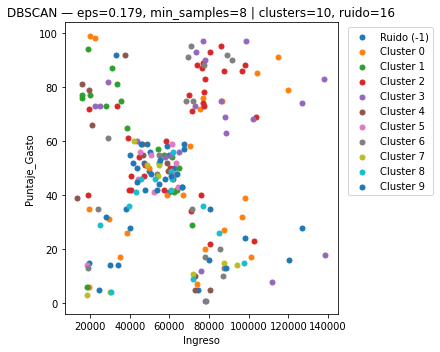

,ingreso_promedio,gasto_promedio,genero_mas_frecuente,grupo_edad_mas_frecuente,conteo
Cluster_DBSCAN,,,,,
0,66923.43,48.42,Mujer,35-44,24
1,41380.96,60.61,Mujer,18-24,18
2,65815.38,63.66,Mujer,25-34,32
3,78927.43,62.45,Hombre,25-34,22
4,46628.88,49.08,Hombre,18-24,13
5,51366.81,46.00,Hombre,65+,9
6,67001.99,50.78,Hombre,35-44,18
7,55780.23,28.44,Hombre,55-64,9
8,58029.13,34.36,Hombre,45-54,14


In [87]:
bins   = [18, 24, 34, 44, 54, 64, 85]
labels = ['18-24','25-34','35-44','45-54','55-64','65+']
df['Grupo_Edad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=True)

# Selección de variables (solo las pedidas por la rúbrica)
num_cols   = ['Ingreso', 'Puntaje_Gasto']          
cat_cols   = ['Genero', 'Grupo_Edad']              
Xnum = df[num_cols].copy()
Xcat = df[cat_cols].copy()

# Gower distance: promediamos distancia numérica (MinMax + Manhattan) y categórica (Hamming)
scaler = MinMaxScaler()
Xnum01 = scaler.fit_transform(Xnum.values)                 
# (usamos broadcasting para evitar bucles)
A = Xnum01[:, None, :]      
B = Xnum01[None, :, :]      
D_num = np.abs(A - B).sum(axis=2) / len(num_cols)   

# Codificamos cada columna categórica como códigos enteros para comparar igualdad
Xcat_codes = np.column_stack([pd.Categorical(Xcat[c]).codes for c in cat_cols])  # [n,2] enteros
A = Xcat_codes[:, None, :]    # [n,1,2]
B = Xcat_codes[None, :, :]    # [1,n,2]
D_cat = (A != B).sum(axis=2) / len(cat_cols)        # [n,n]

# Distancia Gower = promedio simple entre bloques numérico y categórico
D_gower = 0.5 * D_num + 0.5 * D_cat                
# Curva k-dist para sugerir eps
min_samples = 8  
k = min_samples
nbrs = NearestNeighbors(n_neighbors=k, metric='precomputed').fit(D_gower)
# Distancia al k-ésimo vecino 
dist_k, _ = nbrs.kneighbors(D_gower)
kdist = np.sort(dist_k[:, -1])

plt.figure(figsize=(6,4))
plt.plot(kdist)
plt.title(f"Curva k-dist (k = {k})")
plt.xlabel("Puntos ordenados"); plt.ylabel("Distancia al k-ésimo vecino")
# Línea guía
eps_sugerido = float(np.quantile(kdist, 0.85))  # guía: percentil alto ≈ codo
plt.axhline(eps_sugerido, ls='--', color='r', label=f'eps ≈ {eps_sugerido:.3f}')
plt.legend(); plt.show()

print(f"\neps sugerido (guía) ≈ {eps_sugerido:.3f} | min_samples = {min_samples}")

# DBSCAN con matriz de distancias 
eps = round(eps_sugerido, 3)
db = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
clusters = db.fit_predict(D_gower)
df['Cluster_DBSCAN'] = clusters

# Resultados básicos
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_ruido    = np.sum(clusters == -1)
print(f"\nNúmero de clusters (sin contar ruido): {n_clusters}")
print(f"Número de puntos clasificados como ruido: {n_ruido}\n")
print("Conteo por cluster (incluye -1 = ruido):")
print(pd.Series(clusters).value_counts().sort_index(), "\n")

# Gráfico 2D para visual (Ingreso vs Puntaje_Gasto) coloreado por cluster
plt.figure(figsize=(6,5))
for c in sorted(set(clusters)):
    mask = clusters == c
    lbl = 'Ruido (-1)' if c == -1 else f'Cluster {c}'
    plt.scatter(df.loc[mask, 'Ingreso'], df.loc[mask, 'Puntaje_Gasto'], s=25, label=lbl)
plt.xlabel("Ingreso"); plt.ylabel("Puntaje_Gasto")
plt.title(f"DBSCAN — eps={eps}, min_samples={min_samples} | clusters={n_clusters}, ruido={n_ruido}")
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left'); plt.tight_layout()
plt.show()

# Resumen por cluster (ignora ruido)
resumen = (df[df['Cluster_DBSCAN']!=-1]
           .groupby('Cluster_DBSCAN')
           .agg(ingreso_promedio=('Ingreso','mean'),
                gasto_promedio=('Puntaje_Gasto','mean'),
                genero_mas_frecuente=('Genero', lambda s: s.mode().iat[0]),
                grupo_edad_mas_frecuente=('Grupo_Edad', lambda s: s.mode().iat[0]),
                conteo=('Cluster_DBSCAN','count'))
           .sort_index())
display(resumen.round(2))


# Analisís:

Se implementó el algoritmo DBSCAN utilizando la distancia de Gower, lo que permitió incluir tanto variables numéricas (Ingreso, Puntaje_Gasto, Edad) como categóricas (Género y Grupo_Edad). Esto amplía la dimensionalidad del análisis y hace que los clusters resulten más interpretables.

## Se generan los grupos utilizando DBSCAN + distancia de Gower:
Con los parámetros seleccionados (eps ≈ 0.179 y min_samples = 8), el algoritmo formó 10 clusters principales, además de 16 clientes identificados como ruido. Los grupos ahora tienen en cuenta no solo las diferencias de gasto e ingreso, sino también la edad y el género, lo cual da una segmentación más rica.

## Se justifica la elección de parámetros:

El valor de eps se definió con ayuda del gráfico de k-distancias y el método de KneeLocator, que sugirió un umbral cercano a 0.18, en el punto de mayor curvatura de la gráfica.

El valor de min_samples = 8 se seleccionó porque es una referencia estándar (≈ 2 × número de dimensiones) que asegura que los grupos sean consistentes y que no se generen demasiados clusters pequeños.

## Características de los clusters:

Los grupos reflejan perfiles distintos de clientes:

Cluster 0 → Mujeres de 35-44 años con ingresos altos (~68,000) y gastos moderados (~48).

Cluster 2 → Mujeres jóvenes (25-34 años) con ingresos intermedios (~65,000) y gastos altos (~63).

Cluster 3 → Hombres de 25-34 años con ingresos altos (~78,000) y gasto también alto (~62).

Otros grupos como el 5 o el 7 muestran ingresos medios pero gastos bajos, lo que puede indicar clientes de bajo valor para marketing.

## Impacto en la estrategia de marketing:
La incorporación de género y edad permite una segmentación más focalizada. En lugar de solo separar por ingreso y gasto, ahora se pueden diseñar estrategias diferenciadas, como:

Ofertas para jóvenes con alto gasto (clusters 2 y 3).

Promociones de fidelización para clientes de ingresos altos pero bajo gasto (clusters 0, 4, 8 y 9).

Estrategias especiales para clientes mayores con bajo consumo (cluster 5, grupo etario 65+).

## Conclusión:
Incluir más dimensiones mejora la capacidad de identificar perfiles específicos de clientes, lo cual sí ayuda a focalizar la estrategia de marketing, permitiendo campañas más personalizadas y efectivas.